In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house=pd.read_csv(r"D:\RESUME ML PROJECTS\HOUSE_PRICES\notebooks\house_price\House_Rent_Dataset.csv")

In [3]:
house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
house.shape

(4746, 12)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
house=house.drop(columns=["Area Locality","Posted On","Floor"])

In [7]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
house.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [9]:
house.duplicated().sum()

260

In [10]:
house=house.drop_duplicates()

In [11]:
house.shape

(4486, 9)

In [12]:
# def replace(val):
#     if "Ground" in val:
#         return "Ground Floor"
#     elif "Upper Basement" in val:
#         return "Upper Basement"
#     elif 'Lower Basement' in val:
#         return 'Lower Basement'
#     else:
#         # Replace '1 out of 3' or similar with the first number
#         return int(val.split(' out ')[0])
    
# #  Apply the function to the column
# house['Floor'] = house['Floor'].apply(replace)

# print(house)

In [13]:
house.head(2)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [14]:
house["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [15]:
house["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [16]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [17]:
house["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [18]:
house["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [19]:
house["Size"].unique()

array([1100,  800, 1000,  850,  600,  700,  250, 1200,  400,  375,  900,
       1286, 2000,  660,  650,  300, 1600,  355,  350,  550,  500,  630,
        270, 1500, 1300, 1068,  150,  450,  720,  680,  950, 1800,  480,
        435, 1450,  750,  220,   20,  200,  840,  740,  490,  751,  280,
        120, 1220,  670,  190,  240, 2200,  685,   44, 1110,  392,  710,
       1400,  160, 1250,  839,  230,  620, 1350,  723,  320, 2160, 1700,
        130,  505, 4000, 1190, 1012,  812,  420, 1750,  830, 1050,  960,
        756,  288,  986, 1330,  322, 3500,  957, 1430, 1320,  475,  780,
        570,  460,  530,  558,  175,  425,  721, 1150, 2210,  675, 1880,
        640, 1650,  518,  777, 2308,  890,  888,  275,  424, 2079,  586,
        610,  488,  722,  470,  410,  540,  932,  560, 3000,  696, 2500,
        715, 1337,  737,  760,  365, 2600, 1783,  565, 1514, 1080,  825,
        360, 1545,  432,  695, 1095,  790,  661,  330,  925, 1105, 1460,
        415,  585, 1755,  385,  628, 1064,  845, 19

In [20]:
house["BHK"].value_counts()

BHK
2    2121
3    1078
1    1074
4     186
5      19
6       8
Name: count, dtype: int64

In [21]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<Axes: xlabel='BHK', ylabel='Count'>

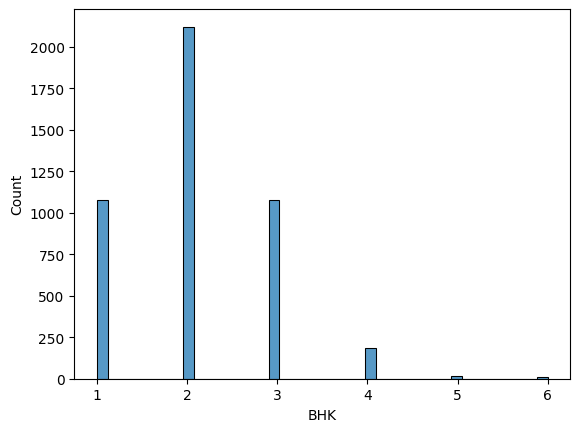

In [22]:
sns.histplot(house["BHK"])

<Axes: xlabel='Bathroom', ylabel='Count'>

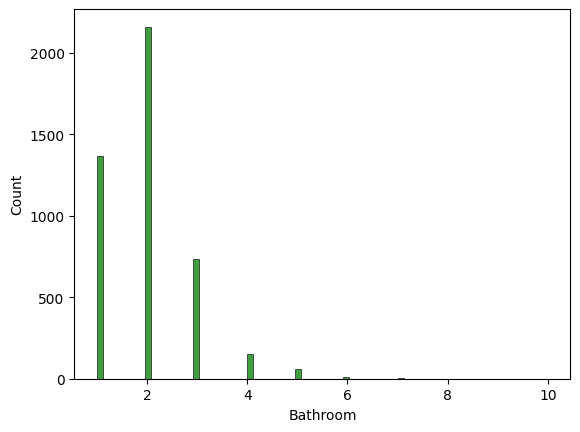

In [23]:
sns.histplot(house["Bathroom"],color="g")

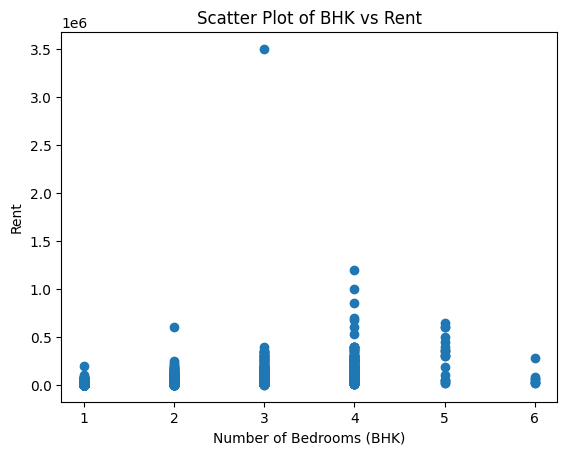

In [24]:
import matplotlib.pyplot as plt

# Assuming house is your DataFrame
plt.scatter(house["BHK"], house["Rent"])

# Add labels and title
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Rent")
plt.title("Scatter Plot of BHK vs Rent")

# Show the plot
plt.show()


<Axes: xlabel='Furnishing Status', ylabel='Count'>

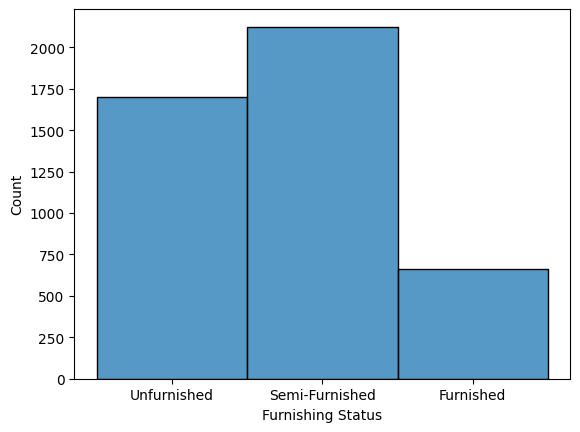

In [25]:
sns.histplot(house["Furnishing Status"])

C:\Users\HP\AppData\Local\Temp\ipykernel_20068\3023450329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["Rent"])


<Axes: xlabel='Rent', ylabel='Density'>

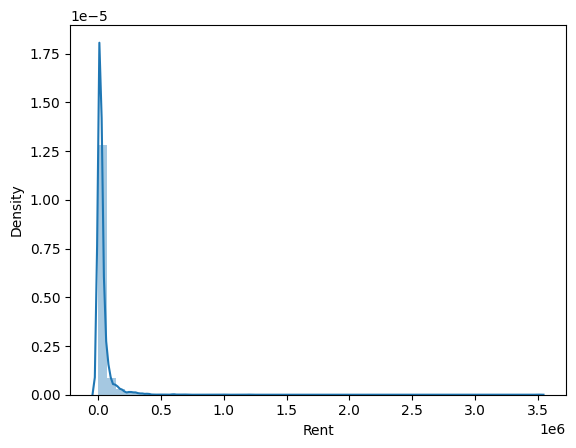

In [26]:
sns.distplot(house["Rent"])

<Axes: ylabel='Rent'>

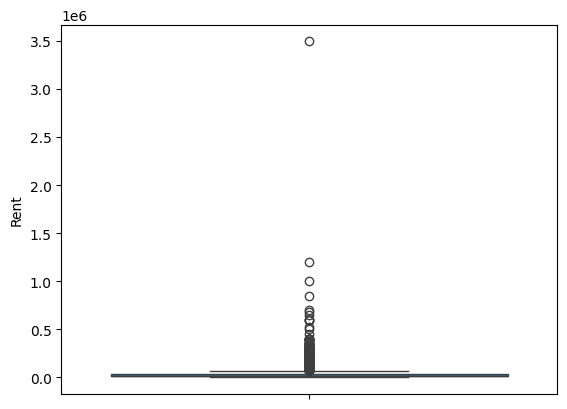

In [27]:
sns.boxplot(house["Rent"])

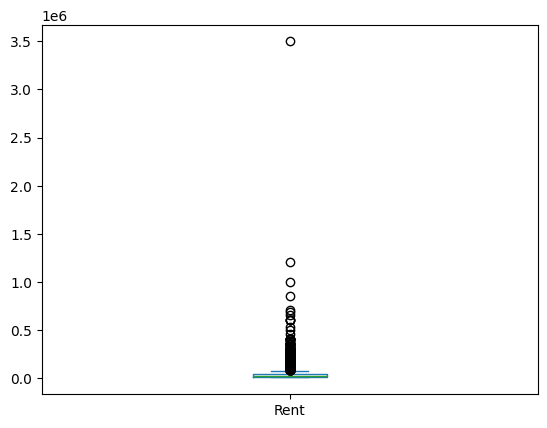

In [28]:
import matplotlib.pyplot as plt
house['Rent'].plot(kind='box')
plt.show()


In [33]:
import pandas as pd

# Assuming df is your DataFrame and 'target' is the target column
Q1 = house['Rent'].quantile(0.25)
Q3 = house['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only values within the bounds
house_filtered = house[(house['Rent'] >= lower_bound) & (house['Rent'] <= upper_bound)]

# Optionally, you can reset the index after filtering
house_filtered = house_filtered.reset_index(drop=True)


In [36]:
house_filtered

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4019,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4020,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4021,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4022,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


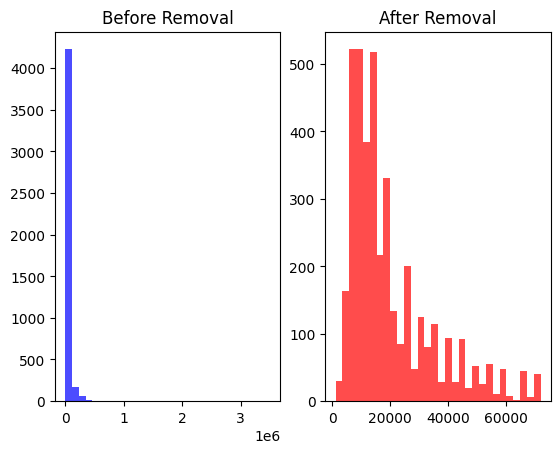

In [37]:
# Plot histograms before and after removing outliers
plt.subplot(1, 2, 1)
plt.hist(house['Rent'], bins=30, color='blue', alpha=0.7, label="Before Removal")
plt.title("Before Removal")

plt.subplot(1, 2, 2)
plt.hist(house_filtered["Rent"], bins=30, color='red', alpha=0.7, label="After Removal")
plt.title("After Removal")

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_20068\3505928923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_filtered["Rent"])


<Axes: xlabel='Rent', ylabel='Density'>

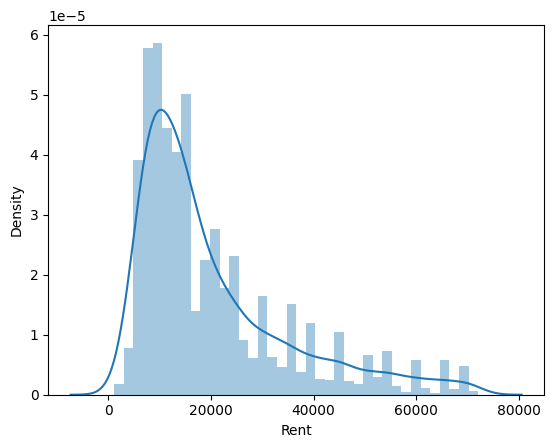

In [38]:
sns.distplot(house_filtered["Rent"])

In [39]:
numeric=house.select_dtypes(exclude="object").columns

In [40]:
numeric

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [41]:
categorical=house.select_dtypes(include="object").columns

In [42]:
categorical

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [43]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [44]:
x=house.drop(columns=["Rent","Point of Contact"])
y=house["Rent"]

In [45]:
print(x)

      BHK  Size    Area Type       City Furnishing Status  Tenant Preferred  \
0       2  1100   Super Area    Kolkata       Unfurnished  Bachelors/Family   
1       2   800   Super Area    Kolkata    Semi-Furnished  Bachelors/Family   
2       2  1000   Super Area    Kolkata    Semi-Furnished  Bachelors/Family   
3       2   800   Super Area    Kolkata       Unfurnished  Bachelors/Family   
4       2   850  Carpet Area    Kolkata       Unfurnished         Bachelors   
...   ...   ...          ...        ...               ...               ...   
4741    2  1000  Carpet Area  Hyderabad    Semi-Furnished  Bachelors/Family   
4742    3  2000   Super Area  Hyderabad    Semi-Furnished  Bachelors/Family   
4743    3  1750  Carpet Area  Hyderabad    Semi-Furnished  Bachelors/Family   
4744    3  1500  Carpet Area  Hyderabad    Semi-Furnished            Family   
4745    2  1000  Carpet Area  Hyderabad       Unfurnished         Bachelors   

      Bathroom  
0            2  
1            1  


In [46]:
print(y)

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4486, dtype: int64


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
categorical=x.select_dtypes(include="object").columns
numerical=x.select_dtypes(exclude="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
      ("OneHotEncoder", oh_transformer, categorical),
         ("StandardScaler", numeric_transformer, numerical),        
    ]
)

In [48]:
X = preprocessor.fit_transform(x)

In [49]:
X

array([[ 0.        ,  0.        ,  1.        , ..., -0.12376241,
         0.19245155,  0.01975843],
       [ 0.        ,  0.        ,  1.        , ..., -0.12376241,
        -0.27308088, -1.1022203 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.12376241,
         0.03727407, -1.1022203 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.07021212,
         1.20110513,  1.14173716],
       [ 0.        ,  1.        ,  0.        , ...,  1.07021212,
         0.81316144,  0.01975843],
       [ 0.        ,  1.        ,  0.        , ..., -0.12376241,
         0.03727407,  0.01975843]])

In [50]:
X.shape

(4486, 18)

In [51]:
X=pd.DataFrame(X)

In [52]:
X


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.123762,0.192452,0.019758
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.123762,-0.273081,-1.102220
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.123762,0.037274,-1.102220
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.123762,-0.273081,-1.102220
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.123762,-0.195492,-1.102220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.123762,0.037274,0.019758
4482,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.070212,1.589049,1.141737
4483,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.070212,1.201105,1.141737
4484,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.070212,0.813161,0.019758


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
print(X.shape,x_train.shape,x_test.shape)

(4486, 18) (3588, 18) (898, 18)


In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [56]:
models={
    "linear":LinearRegression(),
    "ridge":Ridge(),
    "Lasso":Lasso(),
    "svm":SVR(),
    "decision tree":DecisionTreeRegressor(),
    "random":RandomForestRegressor(),
    "neoghbors":KNeighborsRegressor()
}

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lists to store model names and r2 scores
model_list = []
r2_scores = []

# Iterate over models
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluation function
    def evaluate_model(true, predicted):
        mse = mean_squared_error(true, predicted)
        mae = mean_absolute_error(true, predicted)
        r2 = r2_score(true, predicted)
        return mse, mae, r2
    
    # Evaluate model performance on training and test data
    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print the model name
    print(f"Model: {model_name}")
    model_list.append(model_name)
    
    # Print training performance
    print("Performance for Train Data")
    print(f"MSE: {model_train_mse:.4f}")
    print(f"MAE: {model_train_mae:.4f}")
    print(f"R2: {model_train_r2:.4f}")
    
    print("--------------------------------------------------")
    
    # Print test performance
    print("Performance for Test Data")
    print(f"MSE: {model_test_mse:.4f}")
    print(f"MAE: {model_test_mae:.4f}")
    print(f"R2: {model_test_r2:.4f}")
    r2_scores.append(model_test_r2)
    
    print("=" * 35)
    print('\n')

Model: linear
Performance for Train Data
MSE: 4593017728.7991
MAE: 22276.5025
R2: 0.2740
--------------------------------------------------
Performance for Test Data
MSE: 3671142034.9844
MAE: 24287.2116
R2: 0.4445


Model: ridge
Performance for Train Data
MSE: 4592629215.4222
MAE: 22221.2661
R2: 0.2740
--------------------------------------------------
Performance for Test Data
MSE: 3670057340.8387
MAE: 24221.2336
R2: 0.4447


Model: Lasso
Performance for Train Data
MSE: 4592628256.1021
MAE: 22227.5995
R2: 0.2740
--------------------------------------------------
Performance for Test Data
MSE: 3669248902.1749
MAE: 24224.5355
R2: 0.4448




c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.629e+11, tolerance: 2.270e+09
  model = cd_fast.enet_coordinate_descent(


Model: svm
Performance for Train Data
MSE: 6672936898.9199
MAE: 24845.6594
R2: -0.0548
--------------------------------------------------
Performance for Test Data
MSE: 7059647214.4189
MAE: 27845.6585
R2: -0.0682


Model: decision tree
Performance for Train Data
MSE: 41302847.6207
MAE: 2095.1709
R2: 0.9935
--------------------------------------------------
Performance for Test Data
MSE: 3019415513.6365
MAE: 16856.1154
R2: 0.5431


Model: random
Performance for Train Data
MSE: 886894772.8950
MAE: 6789.6786
R2: 0.8598
--------------------------------------------------
Performance for Test Data
MSE: 2554054340.4528
MAE: 15419.8292
R2: 0.6136


Model: neoghbors
Performance for Train Data
MSE: 3192183558.2421
MAE: 12235.4471
R2: 0.4954
--------------------------------------------------
Performance for Test Data
MSE: 4355216666.2152
MAE: 17365.9022
R2: 0.3410




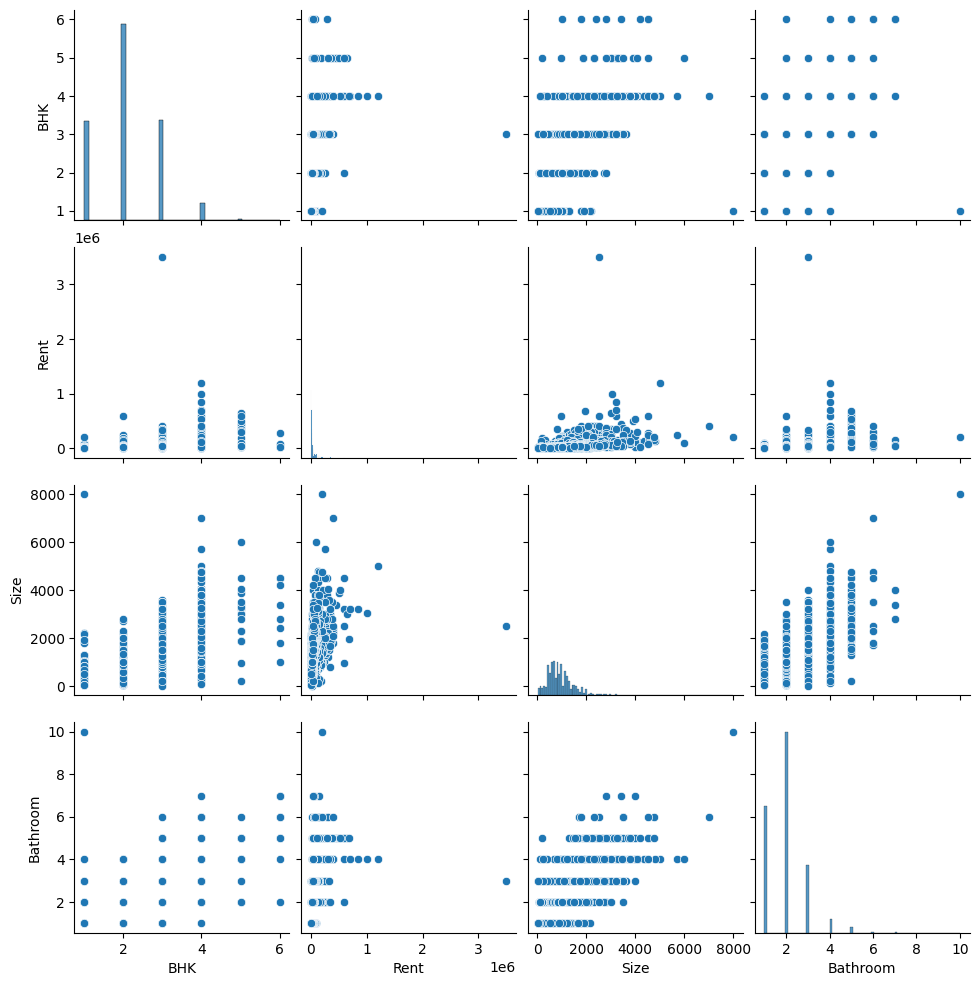

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'house' is your dataframe
sns.pairplot(house)
plt.show()

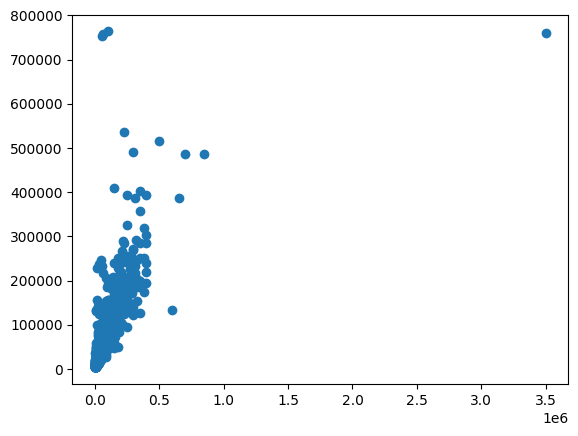

In [59]:
plt.scatter(y_train,y_train_pred)

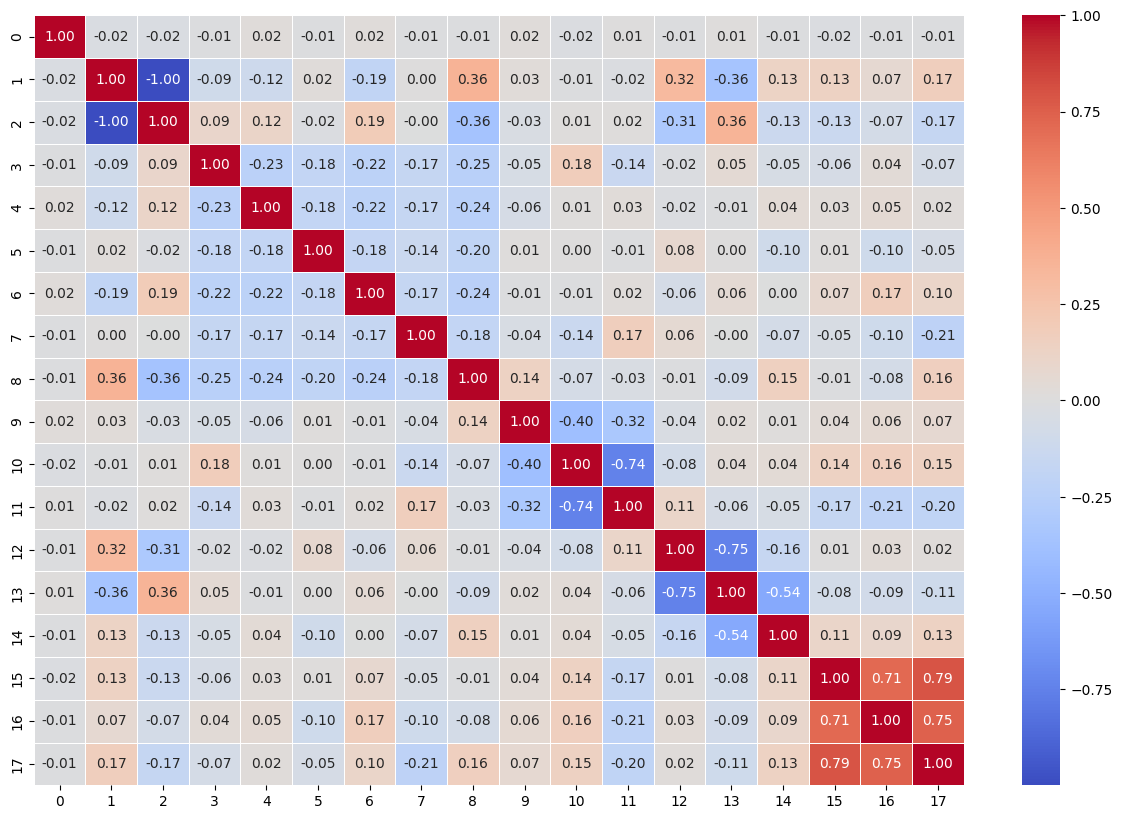

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [82]:
rf=RandomForestRegressor()
param_distributions ={
    'n_estimators':[100,200,300,400,500],
    "criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
   'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]

}

In [83]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=rf, param_distributions =param_distributions , cv=3, n_jobs=-1)

In [84]:
random.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [85]:
random.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=400)

In [86]:
random.best_score_

0.5310090099905237

In [87]:
random_train=random.predict(x_train)
train_score=r2_score(y_train,random_train)
print("training score",train_score)

random_test=random.predict(x_test)
test_score=r2_score(y_test,random_test)
print("tetsing score",test_score)

training score 0.4043167910203963
tetsing score 0.6036961059300925


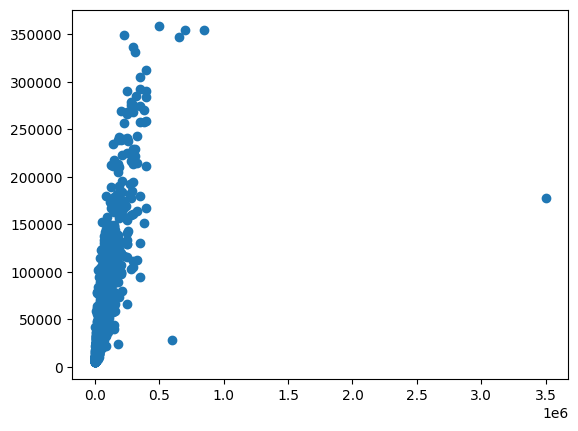

In [88]:
plt.scatter(y_train,random_train)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the RandomForestRegressor with your tuned hyperparameters
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Perform 5-fold cross-validation (you can adjust the cv parameter as needed)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the cross-validation scores and the average score
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores for each fold: [ 0.74297883  0.28271833 -0.04068733  0.29811382 -0.24534598]
Mean cross-validation score: 0.20755553545788946


In [91]:

rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = rf.predict(x_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.6251632853563662
Mean Absolute Error: 14778.096429666653
Root Mean Squared Error: 49773.00986745485


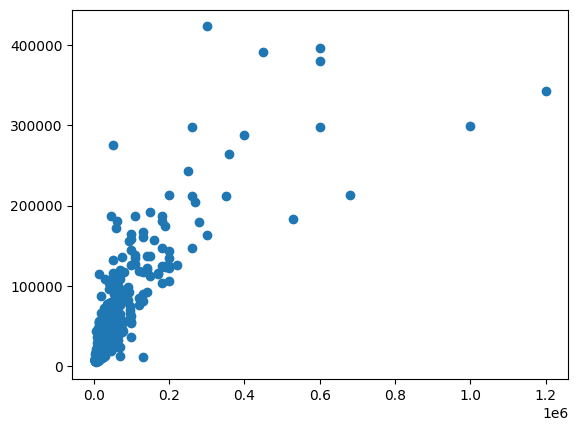

In [97]:
plt.scatter(y_test, y_pred)

In [98]:
y_pred = rf.predict(x_train)
print("R-squared:", r2_score(y_train, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_pred)))

R-squared: 0.5898642913981418
Mean Absolute Error: 10744.869865850596
Root Mean Squared Error: 50937.63512762523


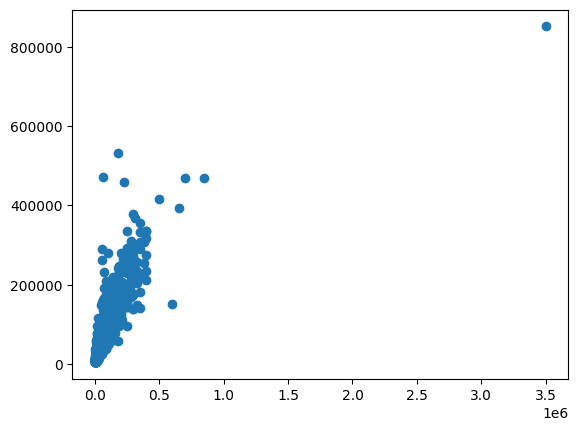

In [99]:
plt.scatter(y_train, y_pred)

<Axes: xlabel='Rent'>

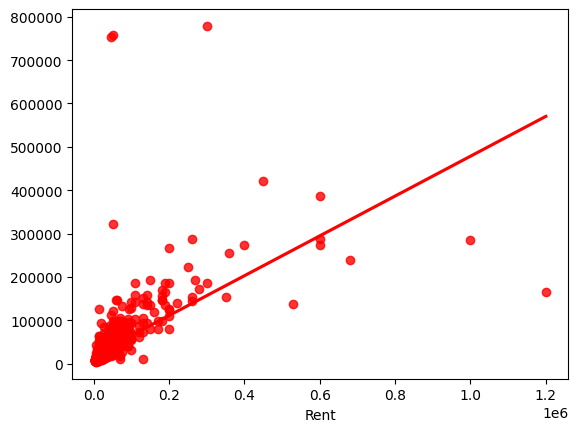

In [100]:
import seaborn as sns
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [103]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 60.47
